<a href="https://colab.research.google.com/github/spesivan/collab_notes/blob/main/rgb_vlue_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [35]:
df = pd.read_excel("./renk_koordinatları.xlsx")

In [36]:
df

,date,X_Kırmızı,Y_Kırmızı,X_Mavi,Y_Mavi,X_Yeşil,Y_Yeşil
0,2024-02-10 16:10:28:573171,18.0,563.0,118,564,68.0,663.0
1,2024-02-10 16:10:28:710729,18.0,563.0,118,564,68.0,663.0
2,2024-02-10 16:10:28:743240,18.0,563.0,118,564,68.0,663.0
3,2024-02-10 16:10:28:782914,18.0,563.0,118,564,68.0,663.0
4,2024-02-10 16:10:28:814637,18.0,563.0,118,564,68.0,663.0
...,...,...,...,...,...,...,...
311,NaN,NaN,NaN,1264,564,NaN,NaN
312,NaN,NaN,NaN,1264,564,NaN,NaN
313,NaN,NaN,NaN,1264,564,NaN,NaN
314,NaN,NaN,NaN,1264,564,NaN,NaN


In [37]:
df.isnull().sum()

date          7
X_Kırmızı     7
Y_Kırmızı     7
X_Mavi        0
Y_Mavi        0
X_Yeşil      27
Y_Yeşil      27
dtype: int64

In [38]:
df = df.iloc[:216]

In [39]:
df=df.iloc[29:]

In [40]:
df.index = pd.to_datetime(df['date'],format = '%Y-%m-%d %H:%M:%S:%f')
df = df.drop("date", axis = 1)
df.head()

,X_Kırmızı,Y_Kırmızı,X_Mavi,Y_Mavi,X_Yeşil,Y_Yeşil
date,,,,,,
2024-02-10 16:10:29.605680,18.0,563.0,118,564,68.0,663.0
2024-02-10 16:10:29.637619,24.0,557.0,124,558,74.0,657.0
2024-02-10 16:10:29.669103,38.0,544.0,138,544,88.0,644.0
2024-02-10 16:10:29.700481,38.0,544.0,138,544,88.0,644.0
2024-02-10 16:10:29.732445,43.0,536.0,143,536,93.0,636.0


<Axes: xlabel='date'>

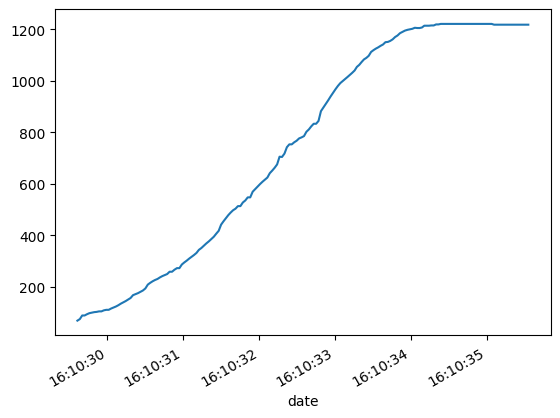

In [47]:
temp = df['X_Yeşil']
temp.plot()

In [57]:
red_values_reshaped = pd.concat([df.iloc[:, 0],df.iloc[:, 1]], axis = 1).values.reshape((-1,2))
blue_values_reshaped = pd.concat([df.iloc[:, 2],df.iloc[:, 3]], axis = 1).values.reshape((-1,2))
green_values_reshaped = pd.concat([df.iloc[:, 4],df.iloc[:, 5]], axis = 1).values.reshape((-1,2))

In [65]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [66]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df, WINDOW_SIZE)
X1.shape, y1.shape

((182, 5, 1, 6), (182, 6))

In [68]:
a = round(len(df) * 0.65)
b = round(len(df) * 0.7)

X_train1, y_train1 = X1[:a], y1[:a]
X_val1, y_val1 = X1[a:b], y1[a:b]
X_test1, y_test1 = X1[b:], y1[b:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((122, 5, 1, 6), (122, 6), (9, 5, 1, 6), (9, 6), (51, 5, 1, 6), (51, 6))

In [69]:
X_train1.shape

(122, 5, 1, 6)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , LSTM

In [75]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))   ####   X_train1.shape is (5,1)
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
# Reshape the input data to match the model's expected shape
X_train1 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], X_train1.shape[2]))

# Fit the model again with the reshaped data
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

ValueError: cannot reshape array of size 3660 into shape (122,5,1)

In [81]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 5, 1, 6)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 5, 1, 6), dtype=float32)
      • training=True
      • mask=None
